<h1 align="center">Sales Profit Prediction Model</h1>

Dataset: <a href="https://github.com/AryanKhokhar07/Portfolio-Projects/blob/main/revenue.csv">Click here for dataset</a>

In [1]:
#Importing some basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing data

data = pd.read_csv("revenue.csv")

In [3]:
data.head()

,Paid,Organic,Social,Profit
0,165349,136898,471784,192261.83
1,162598,151378,443899,191792.06
2,153442,101146,407935,191050.39
3,144372,118672,383200,182901.99
4,142107,91392,366168,166187.94


## About the Project
On this dataset, I'll try to use Linear regression Model to predict the profit generated from mainly 3 sources:
* Paid traffic ---> through advertisements
* Organic (Non-Paid) traffic ---> from search engines
* Social traffic ---> from social networking sites
* The dependent/predicted variable is 'Profit'

I'll start by dealing with any null values and remove the duplicated rows, if any. After that, I'll check the assumptions of Linear Regression model, and will continue with this model if all of the assumptions are satisfied.

### Assumptions of Linear Regression Model:
* Explanatory variables are linearly related to dependent variable
* No perfect multicollinearity
* Homoscedasticity
* No autocorrelation
* Error term are white noise and error term ~ N(0,sigma^2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Paid     1000 non-null   int64  
 1   Organic  1000 non-null   int64  
 2   Social   1000 non-null   int64  
 3   Profit   1000 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 31.4 KB


In [37]:
data.describe()

,Paid,Organic,Social,Profit
count,998.000000,998.000000,998.000000,998.000000
mean,81535.174349,122498.580160,226101.388778,118687.693972
std,46495.414011,9136.345772,91640.028332,39774.331257
min,0.000000,51283.000000,0.000000,14681.400000
25%,43077.500000,116638.250000,150486.500000,85876.136667
50%,79401.000000,122377.000000,223809.500000,117321.534150
75%,123886.250000,129040.500000,308780.000000,154867.853500
max,165349.000000,182646.000000,471784.000000,192261.830000


In [8]:
#Checking the null values

data.isnull().sum()

Paid       0
Organic    0
Social     0
Profit     0
dtype: int64

In [4]:
#Checking for duplicated rows

data.duplicated().sum()

2

In [5]:
#Duplicated rows

duplicate_data = data[data.duplicated()]
duplicate_data

,Paid,Organic,Social,Profit
755,84533,122941,231886,121248.7116
862,153606,133142,365162,180257.1795


In [6]:
#Removing duplicated rows

data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

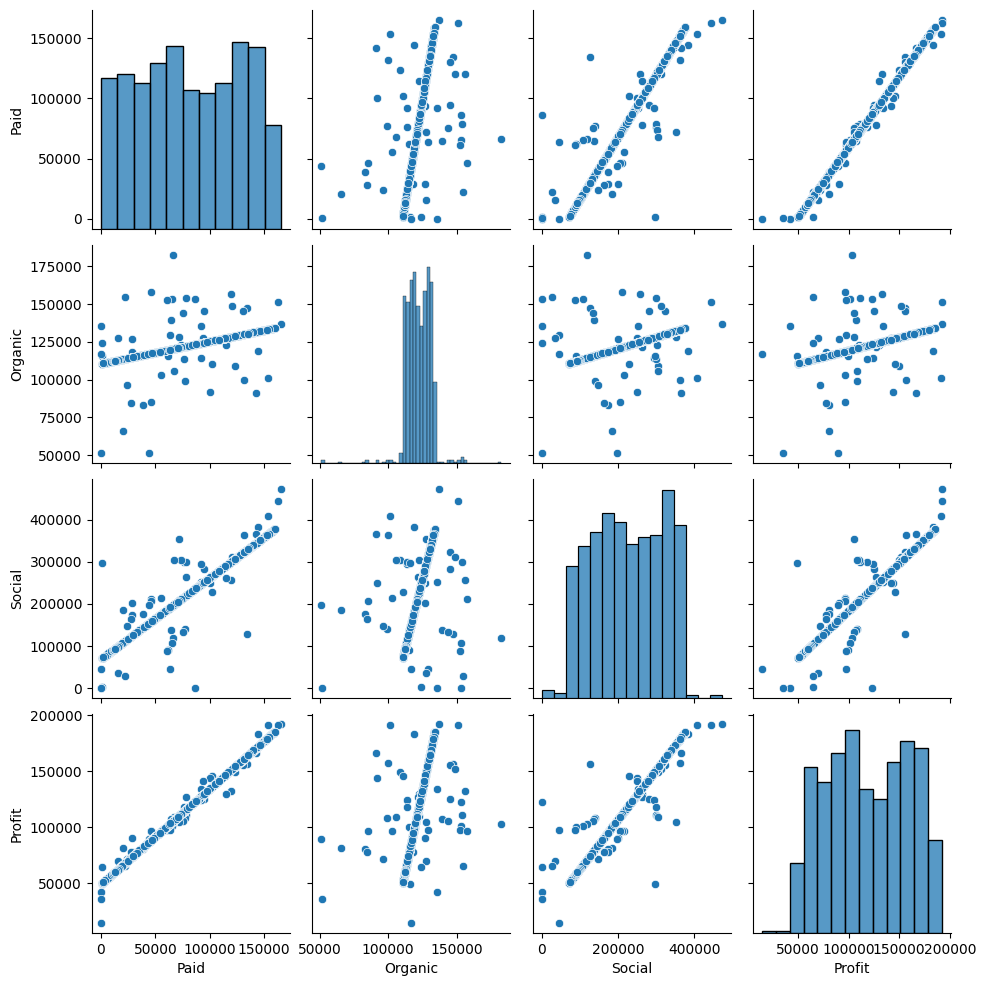

In [7]:
sns.pairplot(data)
plt.show()

The first two assumptions are satisfied as we can observe from the above graphs that there is no perfect multicollinearity among independent variables, and also independent variables are linearly related to dependent variable.

In [20]:
#Splitting the data
from sklearn.model_selection import train_test_split

X = data.drop(['Profit'], axis=1)
y = data['Profit']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
X_train.head()

,Paid,Organic,Social
844,70598,120883,204998
630,125112,128934,310183
394,22014,113708,111255
932,107094,126273,275417
598,19291,113306,106001


In [24]:
# Standardizing the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train

array([[-0.24025823, -0.17853006, -0.23839377],
       [ 0.93532528,  0.67375411,  0.91378701],
       [-1.28796247, -0.93808029, -1.26524059],
       ...,
       [-1.3604849 , -0.99058717, -1.33632013],
       [-1.30342443, -0.94930152, -1.28038977],
       [ 0.98744741,  0.71154636,  0.96487577]])

In [26]:
# For reverting back to original form

scaler.inverse_transform(X_train)

array([[ 70598., 120883., 204998.],
       [125112., 128934., 310183.],
       [ 22014., 113708., 111255.],
       ...,
       [ 18651., 113212., 104766.],
       [ 21297., 113602., 109872.],
       [127529., 129291., 314847.]])

In [27]:
# Linear regression using cross validation

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [28]:
#Cross val score

scores = cross_val_score(regression,X_train,y_train,cv=5)
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.99906389 0.99740115 0.9952016  0.99902951 0.99770478]


In [29]:
#Mean cross val score

print('Average cross-validation score: {:.2f}'.format(scores.mean()))

Average cross-validation score: 1.00


In [30]:
#Predicted values on test data

y_pred = regression.predict(X_test)
print(y_pred)

[ 85651.85125174 170229.12571007  61582.69325876 100773.34417468
 163044.0771629  176213.82831992  86869.2440788  175642.18375996
 174869.49908167  71878.08262735 163578.24190733 106928.44016088
  80994.44177912  60600.4235408   51541.17494809  82614.7850844
 149612.78026819  65263.81016306 103977.40689361 117733.25662226
 114024.01955921 107970.30583266  52695.50870173  62717.43745734
 121937.47931961 169454.72918398 155445.85000368  90273.49099217
 152834.73324757  91894.69022134 181782.79886365  96884.35407851
  77811.68046306 181800.70344175 134255.30654779 110052.40770537
 127000.41959532  88762.19207316  65433.34761551  57741.41287642
 100484.5467553   52128.98536752  91728.54959366 172816.38760926
  94164.19293613 173882.99093269 117322.63146425 108053.79783187
 162641.11413151  99507.41258072 157512.60075234  55178.8474404
 141240.15658287 109838.7337693   99513.21592583  50291.39489596
 135316.77007111 143023.23113789 154830.77534938  91476.39038354
  89913.14331968  89669.487

In [31]:
#Calculating the coefficients

print(regression.coef_)

[37198.68719229  -135.24990351  2453.0937707 ]


In [32]:
#Calculating the intercepts

print(regression.intercept_)

118897.7856173066


In [33]:
#Calculating the R squared value

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9967920654322928

Text(0.5, 1.0, 'Actual v/s Predicted')

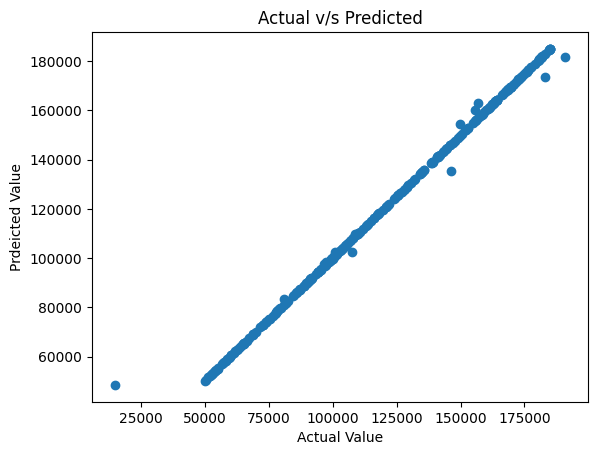

In [34]:
# Linear regression curve

plt.scatter(y_test,y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Prdeicted Value')
plt.title('Actual v/s Predicted')

In [35]:
pred_y_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
453,85529.93509,85651.851252,-121.916162
793,170343.12810,170229.125710,114.002390
209,61393.64099,61582.693259,-189.052269
309,100693.60690,100773.344175,-79.737275
739,163138.03470,163044.077163,93.957537
578,176344.52500,176213.828320,130.696680
851,86750.71746,86869.244079,-118.526619
545,175771.29550,175642.183760,129.111740
436,174996.45320,174869.499082,126.954118
677,71717.75221,71878.082627,-160.330417


C:\Users\Aryan\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


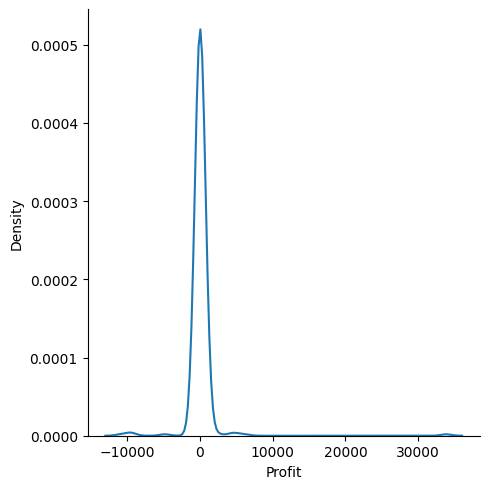

In [36]:
#Plotting the error terms

sns.displot(y_pred-y_test,kind='kde')

The distribution curve of error term is similar to that of Normal distribution and hence, we can conclude that error terms are actually white noise.